**Problem 0**

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


**Problem 1** (10 points)

We will work with the [hand postures dataset](https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures). You saw in the previous problem set that it contains a large amount of missing values. Describe why you would or wouldn't use the techniques in the cells below to handle the missing values in this dataset. Use code to support your argument and write a paragraph or two of text answer for each method. The csv file is located in the data folder.

**Drop the columns with missing values:**


In [2]:
import pandas as pd
import numpy  as np
df_hand=pd.read_csv('data/Postures.csv',na_values='?')
df_hand_noNa=df_hand.dropna(axis=1) #remove 





**Drop the rows with missing values:**

In [3]:
df_hand_noNa=df_hand_noNa.dropna(axis=0)
df_hand_noNa=df_hand_noNa.drop(index=0) #dropping the first row because it has no values
df_hand_noNa

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743
...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853


**Mean or median imputation:**


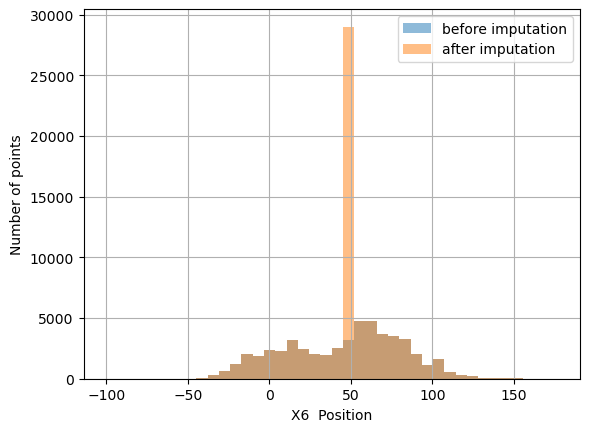

std before imputation: 36.34204399309713
std after imputation: 29.72554254290181


In [4]:

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
X_lot = si.fit_transform(df_hand[['X6']])

df_hand['X6'].hist(bins=40,label = 'before imputation',alpha=0.5)
plt.hist(X_lot,bins=40,label='after imputation',alpha=0.5)
plt.xlabel('X6  Position')
plt.ylabel('Number of points')
plt.legend()
plt.show()

print('std before imputation:',np.std(df_hand['X6']))
print('std after imputation:',np.std(X_lot))


**Problem 2a** (5 points)

Load the diabetes dataset using this [URL](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt). Split and preprocess the dataset as we discussed in class. 

In [5]:
url ='https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
df_dia = pd.read_csv(url, skiprows=0, header=None, sep='\s+')
df_dia.columns = df_dia.iloc[0] #set first row to column labels
df_dia=df_dia.drop(0,axis=0) #remove the extra column names in row 0

df_dia.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,59,2,32.1,101,157,93.2,38,4,4.8598,87,151
2,48,1,21.6,87,183,103.2,70,3,3.8918,69,75
3,72,2,30.5,93,156,93.6,41,4,4.6728,85,141
4,24,1,25.3,84,198,131.4,40,5,4.8903,89,206
5,50,1,23,101,192,125.4,52,4,4.2905,80,135


In [6]:
#hard code the names of the column from previous description


df_dia.columns=['age','sex','bmi','avg_bld_press','tsc','ldl','hdl','tc/hdl','log(serum_tri)','glu','1yr_prog']
df_dia['sex']=df_dia["sex"].astype(int) #converts object type to int
df_dia['sex']=df_dia['sex']-1
df_dia.apply(pd.to_numeric) #make sure all numbers in the dataframe are ints

df_dia.head()


,age,sex,bmi,avg_bld_press,tsc,ldl,hdl,tc/hdl,log(serum_tri),glu,1yr_prog
1,59,1,32.1,101,157,93.2,38,4,4.8598,87,151
2,48,0,21.6,87,183,103.2,70,3,3.8918,69,75
3,72,1,30.5,93,156,93.6,41,4,4.6728,85,141
4,24,0,25.3,84,198,131.4,40,5,4.8903,89,206
5,50,0,23,101,192,125.4,52,4,4.2905,80,135


In [7]:
#doing a basic split. defining the features and the target variable
X=df_dia.loc[:, df_dia.columns != '1yr_prog']
y=df_dia['1yr_prog']
X=X.apply(pd.to_numeric)
y=y.apply(pd.to_numeric)


In [8]:
from sklearn.model_selection import train_test_split 
def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    print((train_size+val_size+test_size))
    
    
    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X,y,\
    train_size = train_size,random_state = random_state)#first split to separate out training data
    
    val_adj=train_size/(1-val_size)
    print(val_adj)
    
    X_val, X_test, y_val, y_test=train_test_split(X_other,y_other,\
    train_size=val_adj,random_state=random_state) #second split to separate validation and test data
    
    
    # test the outputs
    print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
    print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
    print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

    
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test=basic_split(X, y, 0.6, 0.2, 0.2, 42)

1.0
0.7499999999999999
training set: (265, 10) (265,)
validation set: (132, 10) (132,)
test set: (45, 10) (45,)


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import f_regression
#encode each feature to have 0 mean and 1 std dev.
std_scale_fts=[feature for feature in X_train.columns]

#create preprocessor for pipeline
preproc=ColumnTransformer(
    transformers=[
        ('standard_scaler',StandardScaler(),std_scale_fts)
    ])

#create pipeline into one line
data_formatter = Pipeline(steps=[('Pre-Processor', preproc)])


In [10]:
#peforming transformers
#transform feature matrices of each split. Make sure to fit only on training data.
X_train_tran=data_formatter.fit_transform(X_train)
X_val_tran=data_formatter.transform(X_val)
X_test_tran=data_formatter.transform(X_test)

**Problem 2b** (10 points)

Read the wiki pages of the [F test](https://en.wikipedia.org/wiki/F-test) and [mutual information](https://en.wikipedia.org/wiki/Mutual_information), and read the manuals of [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html), [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html), and [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html).

Calculate how strong the linear correlation is between each feature and the target variable (disease progression). Prepare a bar plot that shows the top 5 most important features.

Calculate the non-linear correlations with the target variable and plot the top 5 most important features.

Describe the two plots in a paragraph or two. What similarities and differences do you observe?

Prepare a plot which shows the most important feature vs. the target variable!

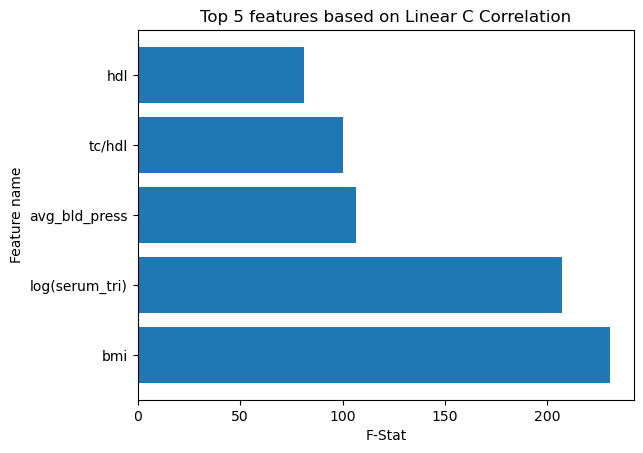

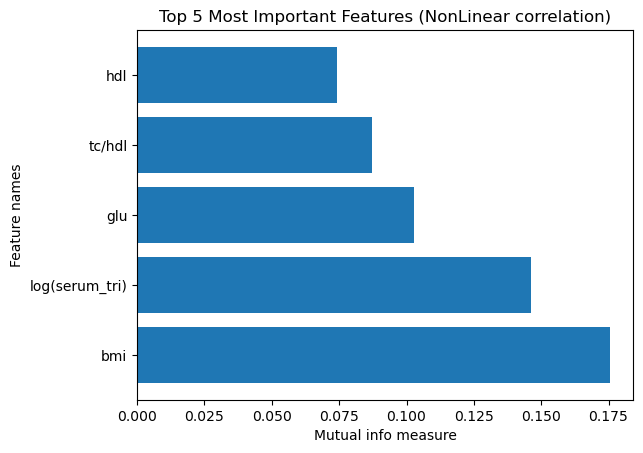

In [11]:
# target var is continuous so we use f_reg and mutual info_reg
topn=5

#linear correlations
# calc f-score
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
fscore,pval=f_regression(X=X,y=y)

#find 5 most important features
lin_f_selector=SelectKBest(f_regression,k=topn)
best_lin_fs=lin_f_selector.fit_transform(X=X,y=y)
lin_feature_mask=lin_f_selector.get_support()
lin_feature_labels=lin_f_selector.get_feature_names_out()
lin_feature_data=pd.Series(fscore[lin_feature_mask], index=lin_feature_labels).sort_values(ascending=False)

#plot top 5 features
plt.barh(y=lin_feature_data.index, width=lin_feature_data)
plt.title('Top 5 features based on Linear C Correlation')
plt.xlabel('F-Stat')
plt.ylabel('Feature name')
plt.show()

#non-linear correlations
#sex is categorical

def reg_params(X,y):
    discrete_ftr_mask =[False,True, False,False, False,False, False,False, False,False]
    return mutual_info_regression(X,y,discrete_features=discrete_ftr_mask,random_state=69)

#calc mutual info
discrete_ftr_mask=[False,True, False,False, False,False, False,False, False,False]
mi=mutual_info_regression(X=X,y=y, discrete_features=discrete_ftr_mask, random_state=69)

#find 5 most important features
nonlin_f_selector = SelectKBest(reg_params, k=topn)
best_nonlin_fs=nonlin_f_selector.fit_transform(X=X,y=y)
nonlin_feature_mask=nonlin_f_selector.get_support()
nonlin_feature_labels=nonlin_f_selector.get_feature_names_out()
nonlin_feature_data=pd.Series(mi[nonlin_feature_mask], index=nonlin_feature_labels).sort_values(ascending=False)

#Plot top 5 features
plt.barh(y=nonlin_feature_data.index,width=nonlin_feature_data)
plt.title('Top 5 Most Important Features (NonLinear correlation)')
plt.xlabel('Mutual info measure')
plt.ylabel('Feature names')
plt.show()


In [15]:
df_dia.head()

,age,sex,bmi,avg_bld_press,tsc,ldl,hdl,tc/hdl,log(serum_tri),glu,1yr_prog
1,59,1,32.1,101,157,93.2,38,4,4.8598,87,151
2,48,0,21.6,87,183,103.2,70,3,3.8918,69,75
3,72,1,30.5,93,156,93.6,41,4,4.6728,85,141
4,24,0,25.3,84,198,131.4,40,5,4.8903,89,206
5,50,0,23,101,192,125.4,52,4,4.2905,80,135


**Problem 3** (10 points)

One EDA step we didn't cover in class is to check how strongly the features correlate. Sometimes you will find strongly correlated or anti-correlated features in your feature matrix (the correlation coefficient is either +1 or -1 or very close to it). If that happens, it is a good idea to remove all but one of the strongly correlated features. This will have no impact on your model's performance.

Use the feature matrix of the diabetes dataset, calculate the Pearson correlation matrix of the features (see method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)) and visualize the correlation matrix as a heatmap. Make sure that the feature names are on the x and y axes, add a colorbar to indicate the strength of the correlation. Note that the Pearson correlation coefficient is between -1 and 1 so make sure the color scale is between -1 and 1 on the figure.

Describe in a paragraph which two features have the strongest correlation. Is there a need to potentially remove any of the features?

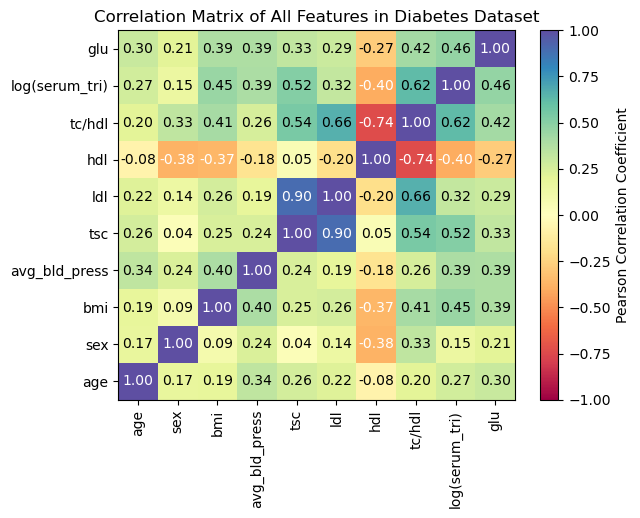

In [18]:
# build a pearson correlation matrix
pearson_corr=X.corr(method='pearson')

#create the heat map
plt.pcolormesh(pearson_corr,vmin=-1,vmax=1,cmap='Spectral')
plt.yticks(np.arange(0.5, len(pearson_corr.index),1), pearson_corr.index)
plt.xticks(np.arange(0.5, len(pearson_corr.columns), 1), pearson_corr.columns, rotation='vertical')
           
#overlay text
for i in range(pearson_corr.shape[0]):
    for j in range(pearson_corr.shape[1]):
        if pearson_corr.iloc[i,j] < -0.35 or pearson_corr.iloc[i, j] >= 0.89:
            plt.text (i + 0.5, j+0.5 ,"%.2f" % pearson_corr.iloc[i, j],
            horizontalalignment='center',
            verticalalignment='center',c='white')
        else:
            plt.text(i + 0.5, j + 0.5 , "%.2f" % pearson_corr.iloc[i, j],
            horizontalalignment='center',
            verticalalignment='center')
                 

plt.colorbar (label='Pearson Correlation Coefficient')
plt.title( 'Correlation Matrix of All Features in Diabetes Dataset')
plt.show()
           